In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset
df = pd.read_csv("merged_patient_features_with_PWV.csv")

# Drop rows with missing values (or apply imputation if needed)
df = df.dropna()

# Define target and features
target = 'Age'
features = df.drop(columns=['patient_id', 'Age', 'Gender'])  # Drop non-numeric or identifier columns

X = features
y = df[target]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = linreg.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 19.93
R² Score: -2.43


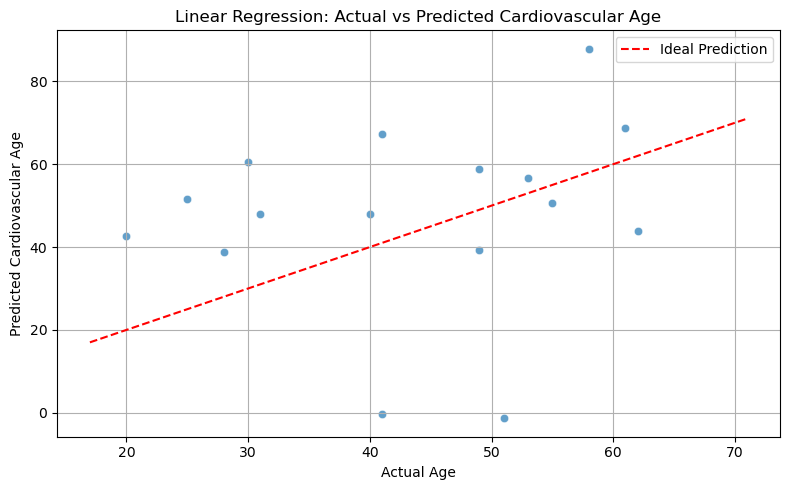

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Ideal Prediction")
plt.xlabel("Actual Age")
plt.ylabel("Predicted Cardiovascular Age")
plt.title("Linear Regression: Actual vs Predicted Cardiovascular Age")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

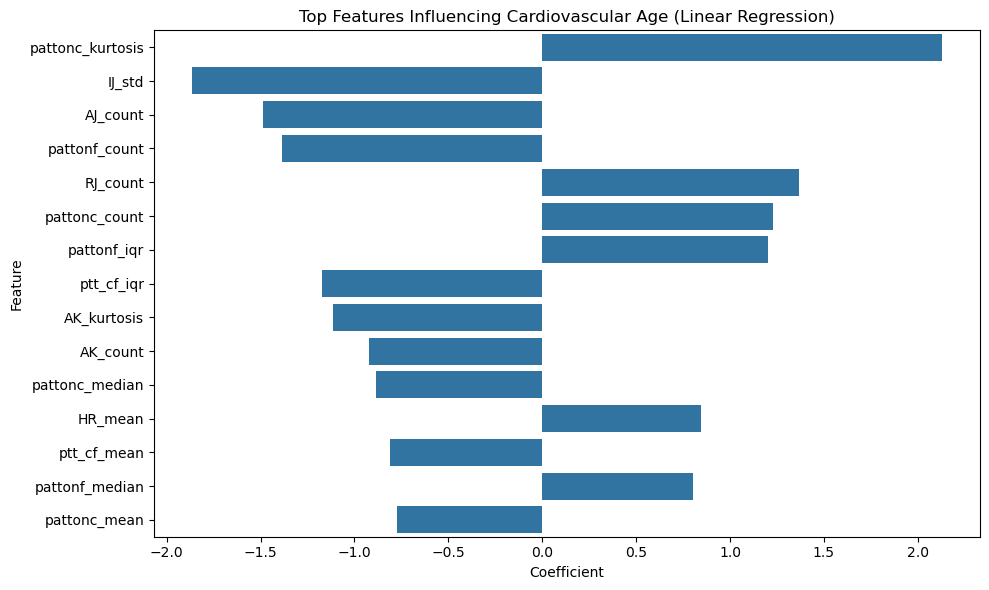

In [11]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linreg.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df.head(15))
plt.title("Top Features Influencing Cardiovascular Age (Linear Regression)")
plt.tight_layout()
plt.show()
